# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [4]:
(x_img_train, y_label_train),(x_img_test, y_label_test) = cifar100.load_data()

169009152/169001437 [==============================] - 519s 3us/step


In [5]:
print('train :',len(x_img_train))
print('test :',len(x_img_test))

train : 50000
test : 10000


In [6]:
x_img_train.shape

(50000, 32, 32, 3)

In [7]:
y_label_train.shape

(50000, 1)

In [8]:
x_img_test.shape

(10000, 32, 32, 3)

In [9]:
y_label_test.shape

(10000, 1)

In [20]:
#針對物件圖像數據集的類別編列成字典


label_dict = {
    0:'apple',1:'aquarium_fish',2:'baby',3:'bear',4:'beaver',5:'bed',6:'bee',7:'beetle', 
    8:'bicycle',9:'bottle',10:'bowl',11:'boy',12:'bridge',13:'bus',14:'butterfly',15:'camel', 
    16:'can',17:'castle',18:'caterpillar',19:'cattle',20:'chair',21:'chimpanzee',22:'clock', 
    23:'cloud',24:'cockroach',25:'couch',26:'crab',27:'crocodile',28:'cup',29:'dinosaur', 
    30:'dolphin',31:'elephant',32:'flatfish',33:'forest',34:'fox',35:'girl',36:'hamster', 
    37:'house', 38:'kangaroo', 39:'keyboard', 40:'lamp', 41:'lawn_mower', 42:'leopard', 43:'lion',
    44:'lizard', 45:'lobster', 46:'man', 47:'maple_tree',48: 'motorcycle',49: 'mountain',50: 'mouse',
    51:'mushroom', 52:'oak_tree', 53:'orange', 54:'orchid',55:'otter', 56:'palm_tree', 57:'pear',
    58:'pickup_truck', 59:'pine_tree', 60:'plain', 61:'plate', 62:'poppy', 63:'porcupine',
    64:'possum', 65:'rabbit', 66:'raccoon', 67:'ray', 68:'road', 69:'rocket', 70:'rose',
    71:'sea', 72:'seal', 73:'shark', 74:'shrew', 75:'skunk', 76:'skyscraper', 77:'snail', 78:'snake',
    79:'spider', 80:'squirrel', 81:'streetcar', 82:'sunflower', 83:'sweet_pepper', 84:'table',
    85:'tank', 86:'telephone', 87:'television', 88:'tiger', 89:'tractor', 90:'train', 91:'trout',
    92:'tulip', 93:'turtle', 94:'wardrobe', 95:'whale', 96:'willow_tree', 97:'wolf',98:'woman',
    99:'worm'
}

In [21]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()


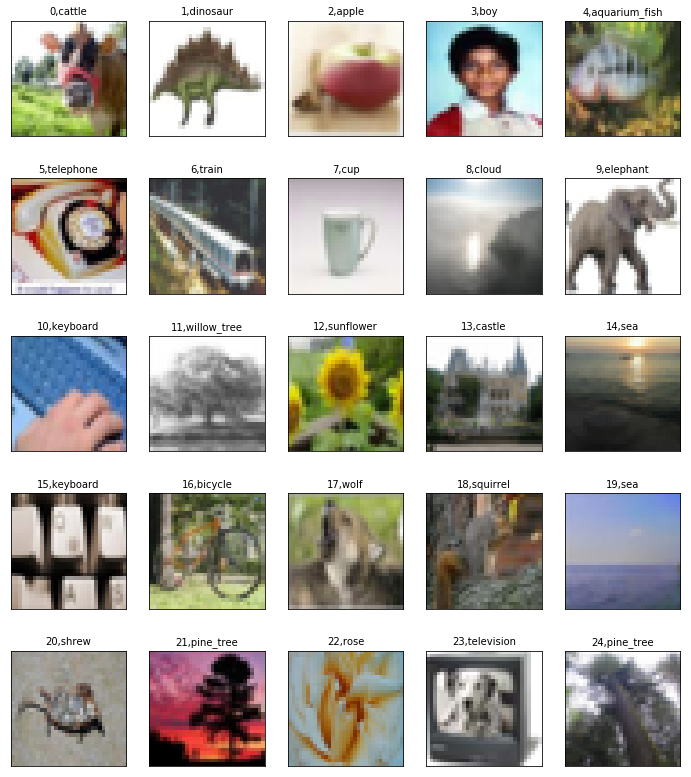

In [23]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0,num = 25)

In [24]:
print('x_img_test:',x_img_test.shape)
print('y_label_test',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test (10000, 1)


# Image normalize 

In [31]:
x_img_train[0][1][18]

array([218, 200, 179], dtype=uint8)

In [26]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [32]:
x_img_train_normalize[0][1][18]

array([0.85490197, 0.78431374, 0.7019608 ], dtype=float32)

# 轉換label 為OneHot Encoding

In [33]:
y_label_train.shape

(50000, 1)

In [34]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [35]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [36]:
y_label_train_OneHot.shape

(50000, 100)

In [37]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.